In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving quikr_car.csv to quikr_car.csv


In [ ]:
df = pd.read_csv('quikr_car.csv')

In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None


In [ ]:
print(df.isnull().sum())

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


In [ ]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

df = df.drop_duplicates()


Number of duplicate rows: 94


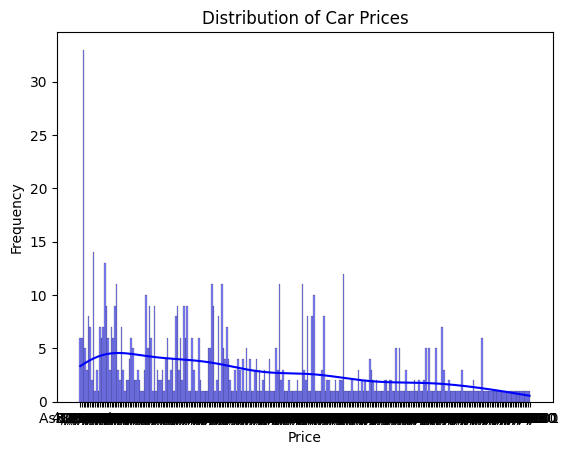

In [ ]:

sns.histplot(df['Price'], kde=True, bins=10, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<ipython-input-57-3073f7f7b3d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


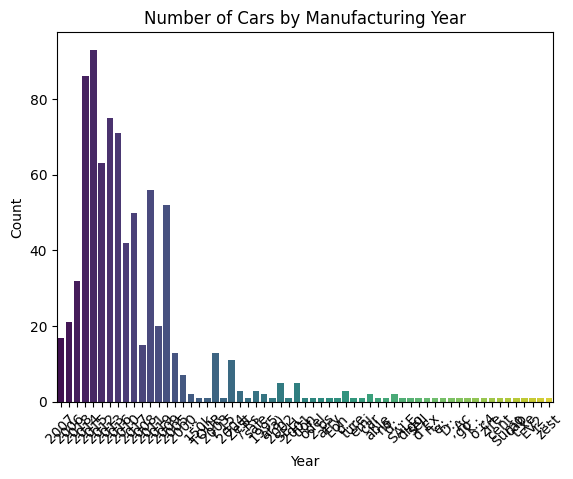

In [ ]:
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Cars by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


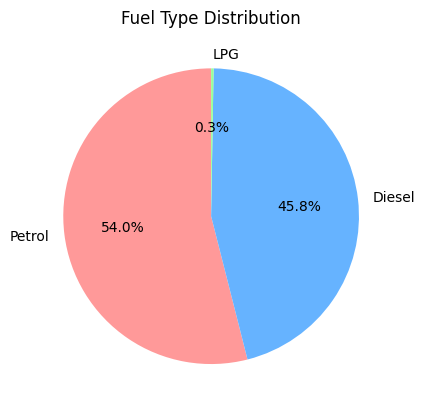

In [ ]:
fuel_counts = df['fuel_type'].value_counts()
fuel_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'], startangle=90)
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.show()


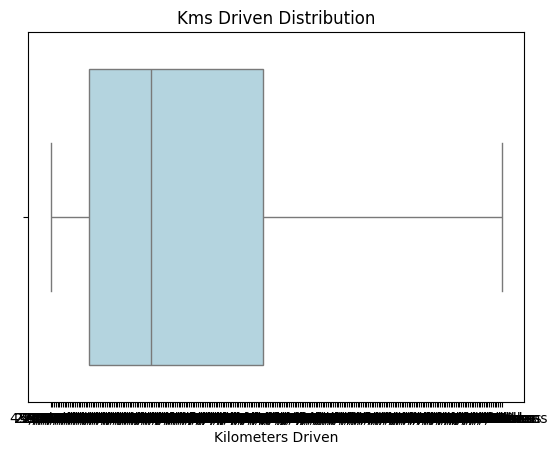

In [ ]:
sns.boxplot(x='kms_driven', data=df, color='lightblue')
plt.title('Kms Driven Distribution')
plt.xlabel('Kilometers Driven')
plt.show()


<ipython-input-60-c32dd0cf38a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='coolwarm')


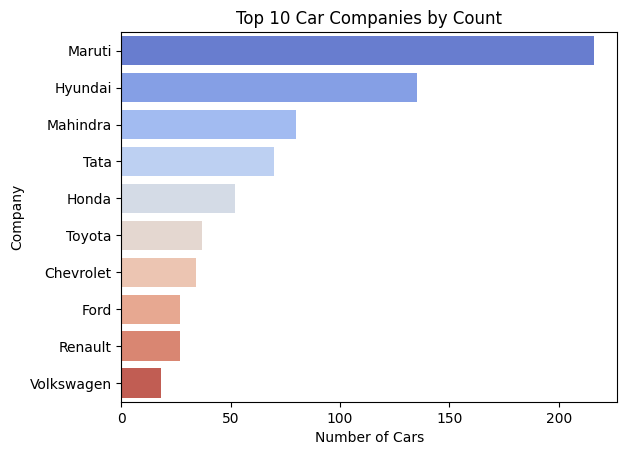

In [ ]:
# Top car companies with the most cars
top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette='coolwarm')
plt.title('Top 10 Car Companies by Count')
plt.xlabel('Number of Cars')
plt.ylabel('Company')
plt.show()


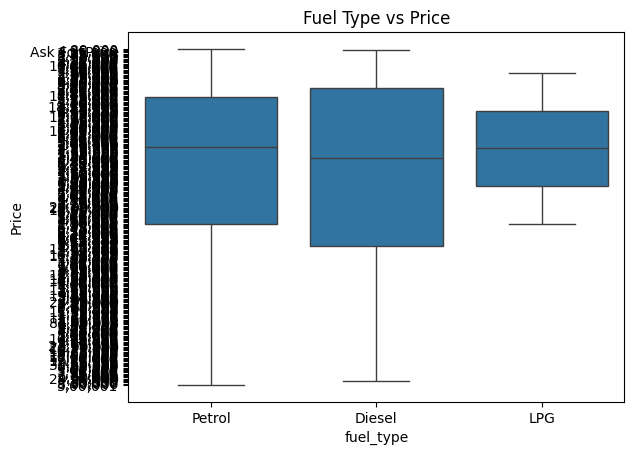

In [ ]:
sns.boxplot(x='fuel_type', y='Price', data=df)
plt.title('Fuel Type vs Price')
plt.show()


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    object
 3   Price       798 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 43.6+ KB
None


In [ ]:
print(df.isnull().sum())

name           0
company        0
year           0
Price          0
kms_driven    50
fuel_type     53
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.describe())

              name company  year          Price  kms_driven fuel_type
count          798     798   798            798         748       745
unique         525      48    61            274         258         3
top     Honda City  Maruti  2015  Ask For Price  45,000 kms    Petrol
freq            11     216    93             33          28       402


In [ ]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [ ]:
# Remove 'kms' from the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '')




In [ ]:
# Remove rows where 'kms_driven' contains 'Petrol' or other non-numeric values
df = df[~df['kms_driven'].str.contains('Petrol', na=False)]




In [ ]:
# Remove rows where Price is "Ask For Price"
df = df[df['Price'] != 'Ask For Price']

# Convert the Price column to numeric after removing commas
df['Price'] = df['Price'].str.replace(',', '').astype(float)



In [ ]:
# Clean 'kms_driven' column: remove 'kms' and commas, and convert to numeric
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '', regex=False).str.replace(',', '').astype(float)

# Fill missing values in 'kms_driven' with the mean
df['kms_driven'] = df['kms_driven'].fillna(df['kms_driven'].mean())

# Fill missing values in 'fuel_type' with 'Missing'
df['fuel_type'] = df['fuel_type'].fillna('Missing')

# Display the updated dataset
print(df)


                                       name   company  year     Price  \
0      Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000.0   
1                   Mahindra Jeep CL550 MDI  Mahindra  2006  425000.0   
3    Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000.0   
4          Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000.0   
6                                 Ford Figo      Ford  2012  175000.0   
..                                      ...       ...   ...       ...   
885               Tata Indica V2 DLE BS III      Tata  2009  110000.0   
886                    Toyota Corolla Altis    Toyota  2009  300000.0   
887                                      Ta      Tara  zest  310000.0   
888                     Tata Zest XM Diesel      Tata  2018  260000.0   
889                      Mahindra Quanto C8  Mahindra  2013  390000.0   

        kms_driven fuel_type  
0     45000.000000    Petrol  
1        40.000000    Diesel  
3     28000.000000    Petrol  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        763 non-null    object 
 1   company     763 non-null    object 
 2   year        763 non-null    object 
 3   Price       763 non-null    float64
 4   kms_driven  763 non-null    float64
 5   fuel_type   763 non-null    object 
dtypes: float64(2), object(4)
memory usage: 41.7+ KB


In [ ]:
# Remove decimal values and convert 'kms_driven' to integers
df['kms_driven'] = df['kms_driven'].astype(int)

# Check the updated column
print(df['kms_driven'].head())


0    45000
1       40
3    28000
4    36000
6    41000
Name: kms_driven, dtype: int64


In [ ]:
# Replace non-numeric values with NaN
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Fill NaN values with the median year
df['year'] = df['year'].fillna(df['year'].median()).astype(int)

# Check unique values after conversion
print(df['year'].unique())


[2007 2006 2014 2012 2013 2016 2015 2010 2017 2008 2018 2011 2019 2009
 2005 2000 2003 2004 1995 2002 2001]


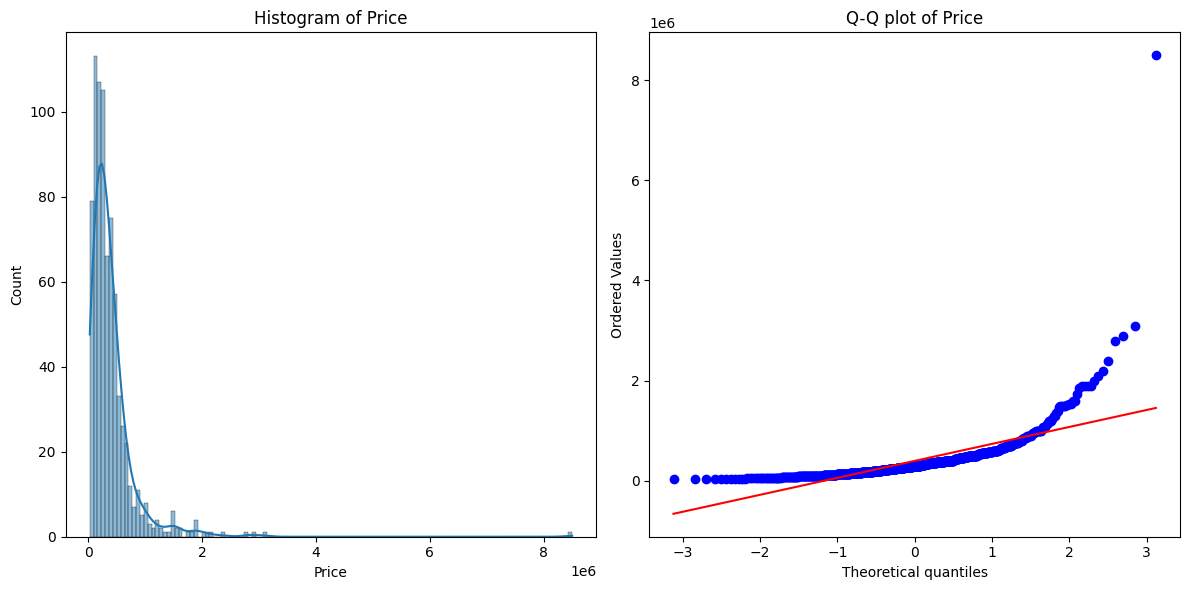

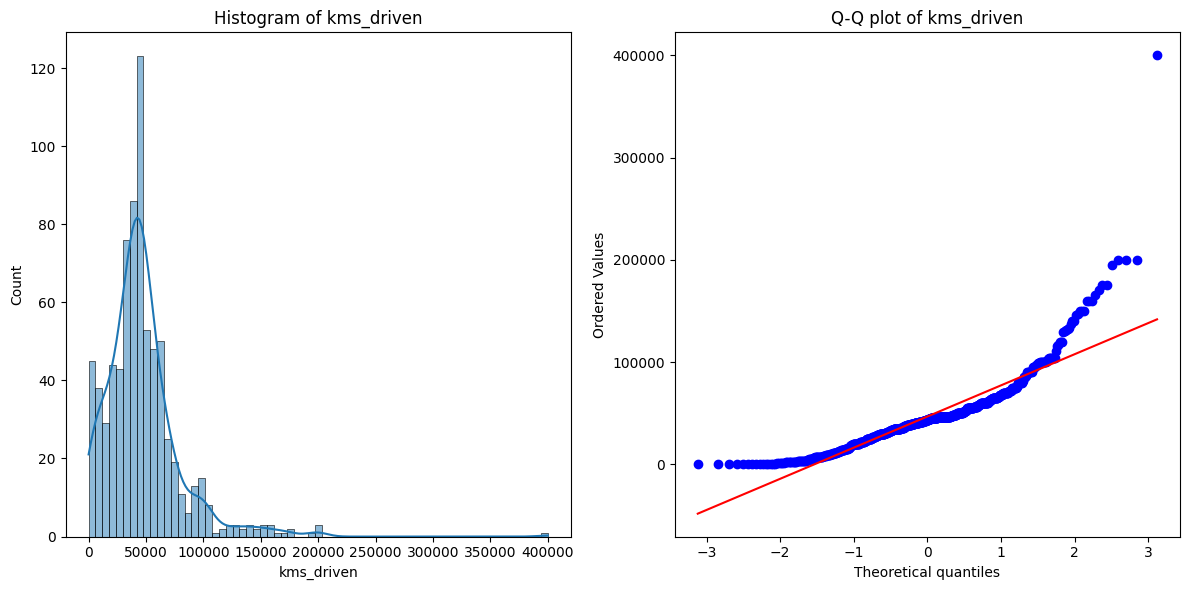

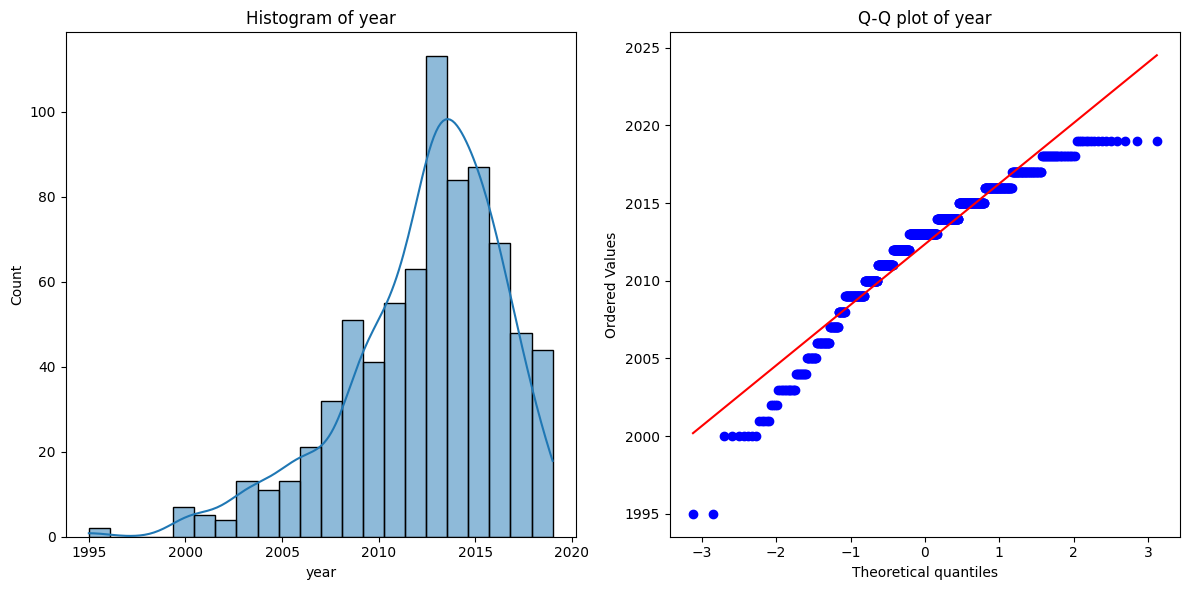

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# List of numerical columns to check (e.g., 'Price', 'kms_driven', 'year')
numerical_columns = ['Price', 'kms_driven', 'year']

# Plot histogram and Q-Q plot for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {col}')

    plt.tight_layout()
    plt.show()


In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df = df[df['Price'] < 6e6].reset_index(drop=True)

In [ ]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'kms_driven'
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median of 'kms_driven'
median_kms = df['kms_driven'].median()
df['kms_driven'] = np.where(df['kms_driven'] > upper_bound, median_kms, df['kms_driven'])
df['kms_driven'] = np.where(df['kms_driven'] < lower_bound, median_kms, df['kms_driven'])

print(df['kms_driven'])





0      45000.0
1         40.0
2      28000.0
3      36000.0
4      41000.0
        ...   
757    30000.0
758    43000.0
759    46762.0
760    27000.0
761    40000.0
Name: kms_driven, Length: 762, dtype: float64


In [ ]:
# Split the 'name' column by spaces and keep only the first three words
df['name'] = df['name'].apply(lambda x: ' '.join(x.split()[:3]))

# Display the updated DataFrame
print(df.sample())


                    name company  year     Price  kms_driven fuel_type
416  Maruti Suzuki Swift  Maruti  2015  250000.0     55000.0    Petrol


In [ ]:
df.sample(20)

,name,company,year,Price,kms_driven,fuel_type
494,Renault Duster 110,Renault,2013,435000.0,39000.0,Diesel
22,Mahindra Bolero DI,Mahindra,2017,180000.0,23452.0,Diesel
169,MARUTI SUZUKI DESI,MARUTI,2013,400000.0,46762.0,Missing
514,Chevrolet Beat Diesel,Chevrolet,2011,125000.0,56000.0,Diesel
695,Hyundai i10 Magna,Hyundai,2009,400000.0,33000.0,Petrol
111,Tata Indica V2,Tata,2006,90000.0,20000.0,Petrol
312,Honda City,Honda,2000,65000.0,80000.0,Petrol
365,Honda City SV,Honda,2017,760000.0,4000.0,Petrol
345,Ford EcoSport Trend,Ford,2013,495000.0,38000.0,Diesel
487,Commercial Chevrolet Sail,Commercial,2013,225000.0,46762.0,Missing


In [ ]:
# Required imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming df is your dataset
# Specify which columns are categorical and numerical
categorical_cols = ['name', 'company', 'fuel_type']
numerical_cols = ['kms_driven', 'year']

# Preprocessing pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing pipeline for numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Combine both categorical and numerical transformers into one column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Select features and target
X = df.drop(['Price'], axis=1)
y = np.log1p(df['Price'])  # Log transformation of target variable

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create the final pipeline with preprocessing and model training
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the model pipeline
model_pipeline.fit(X_train, y_train)

# Predict on the test set (log scale)
y_pred_log = model_pipeline.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)  # Convert actual values back

# Evaluate the model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test_original, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test_original, y_pred):.2f}")


Linear Regression Results:
Mean Squared Error: 12078017299.02
R² Score: 0.86


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [ ]:
import pickle
with open("car_price_model.pkl", "wb") as file:
    pickle.dump(model_pipeline, file)


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import pickle

# Load the trained model (make sure to save it as 'car_price_model.pkl' before)
with open("car_price_model.pkl", "rb") as file:
    model_pipeline = pickle.load(file)

# Define feature names
categorical_cols = ['name', 'company', 'fuel_type']
numerical_cols = ['kms_driven', 'year']

# Function to predict car price
def predict_price(name, company, year, kms_driven, fuel_type):
    # Create input dataframe
    input_data = pd.DataFrame([[name, company, year, kms_driven, fuel_type]],
                              columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])

    # Predict price
    price_pred_log = model_pipeline.predict(input_data)
    price_pred = np.expm1(price_pred_log)  # Convert back from log scale
    return f"Predicted Price: ₹{price_pred[0]:,.2f}"

# Create Gradio interface
inputs = [
    gr.Textbox(label="Car Name"),
    gr.Textbox(label="Company"),
    gr.Number(label="Year", value=2015),
    gr.Number(label="Kilometers Driven", value=50000),
    gr.Dropdown(choices=['Petrol', 'Diesel', 'CNG', 'Electric'], label="Fuel Type")
]

output = gr.Textbox(label="Estimated Price")

gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="Car Price Prediction", live=True).launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://704c95f87915829567.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
